# Módulo 07 - Tarefa 02
#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [349]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.tree import plot_tree, DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix, mean_squared_error

from sklearn.model_selection import train_test_split, cross_val_score

In [350]:
df = pd.read_csv('demo02.csv')

y = df['mau']
y.replace({True: 1, False: 0}, inplace=True)

X = df.drop('mau', axis=1)
y.value_counts()

0    16260
1      390
Name: mau, dtype: int64

In [351]:
[X_treino, X_teste, y_treino, y_teste] = train_test_split(X, y, 
                                          test_size = 0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [352]:
# 1. Defina um objeto com a função da árvore de decisão vista em aula.

mod = DecisionTreeRegressor(max_depth=2, random_state=100)
mod.fit(X_treino, y_treino)
p = mod.predict(X_teste)
np.sqrt(mean_squared_error(y_teste, p))

0.15734551271731814

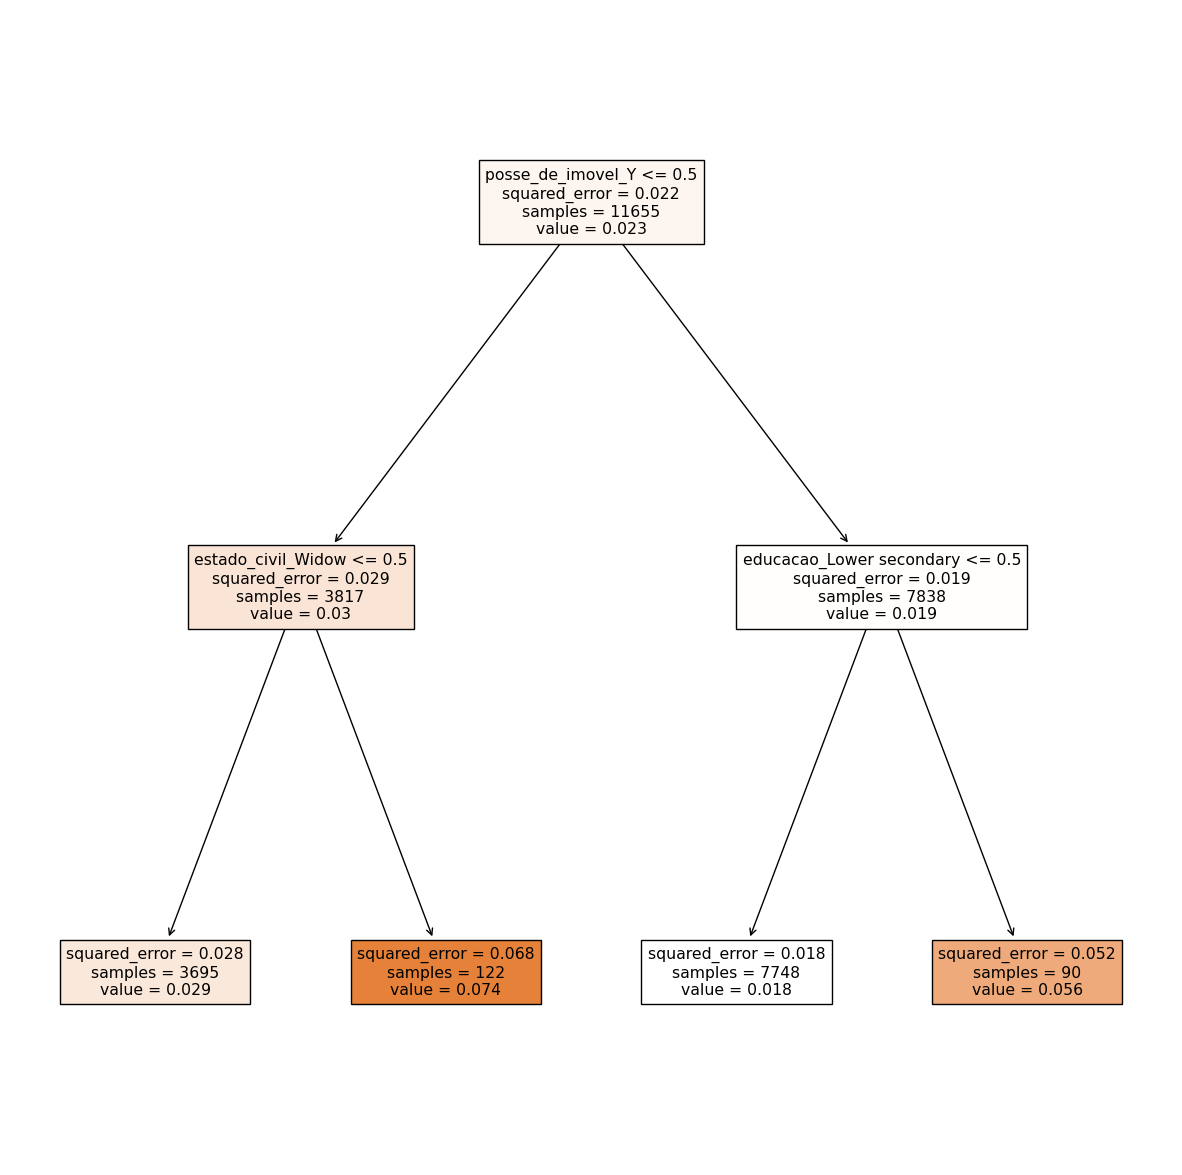

In [353]:
# 2. Treine o modelo com os dados que você separou para treinamento:
# 3. Visualize a árvore. Talvez você queira aumentar um pouco a figura:

%matplotlib inline
plt.figure(figsize = (15, 15))
plot_tree(mod, feature_names = X_teste.columns, filled = True);

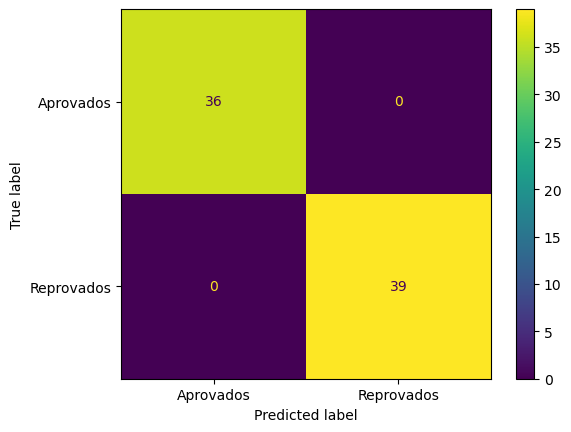

In [354]:
# 4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos 
# como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito:

X, y = make_classification(random_state=100)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=100)

model = SVC(random_state=100)
model.fit(X_treino, y_treino)
SVC(random_state=100)

ConfusionMatrixDisplay.from_estimator(
     model, X_treino, y_treino, display_labels=['Aprovados','Reprovados']);

In [355]:
# 5. Calcule a acurácia na base de treinamento:

pred = model.predict(X_treino)
accuracy_score(y_treino, pred)

1.0

In [356]:
# 2. Treine o modelo com os dados que você separou para treinamento:
# 3. Visualize a árvore. Talvez você queira aumentar um pouco a figura:

y = pd.DataFrame(df['mau'])
X = pd.DataFrame(df.drop('mau', axis=1))
[X_treino, X_teste, y_treino, y_teste] = train_test_split(X, y, 
                                          test_size = 0.3, random_state=100)

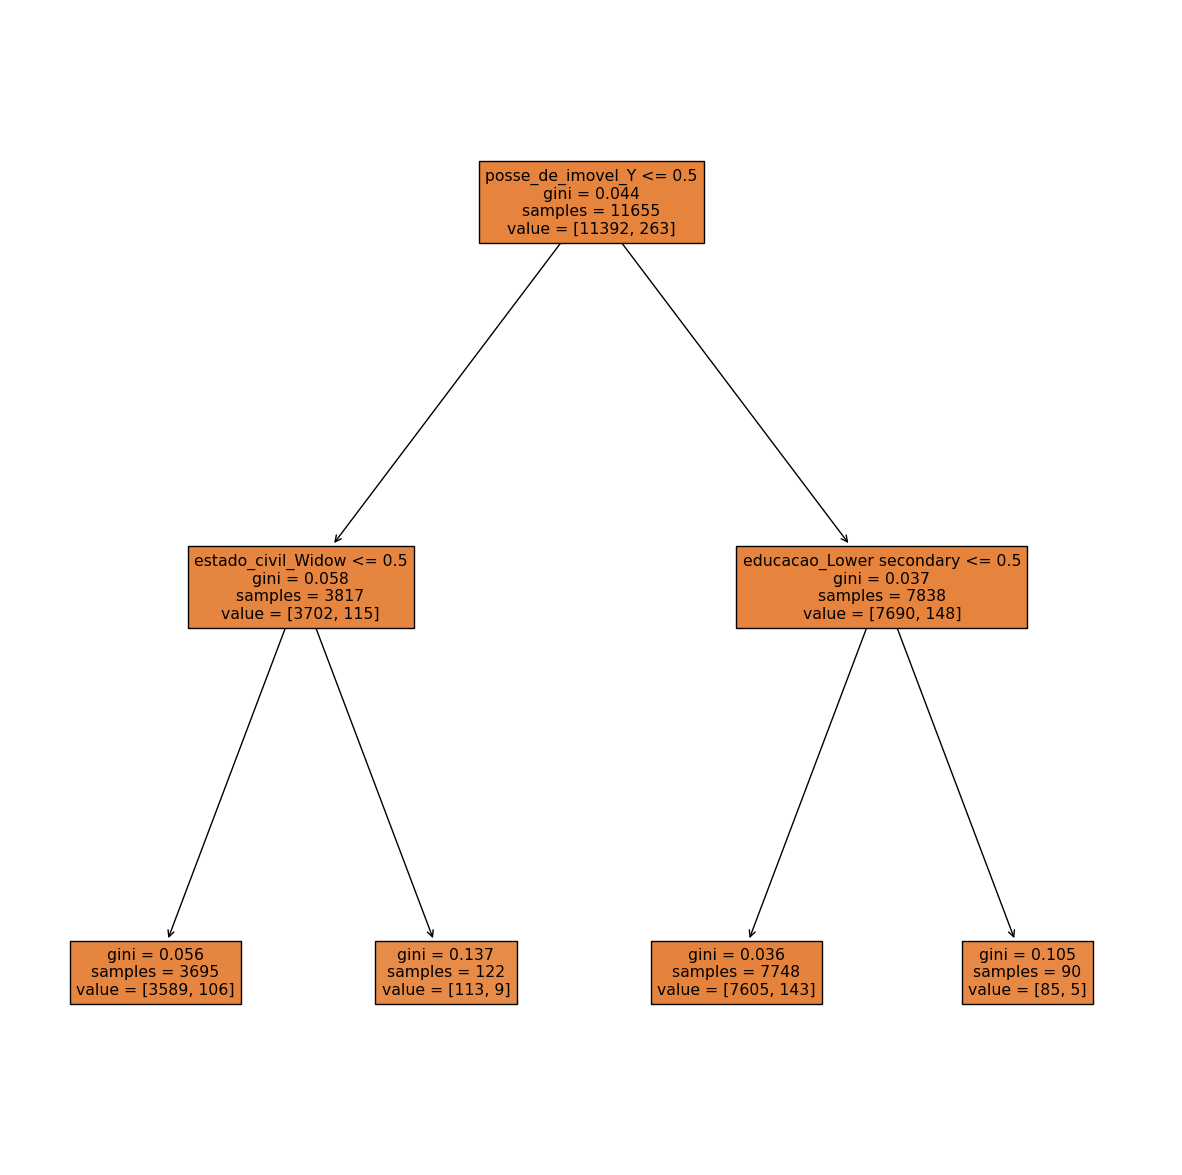

In [357]:
model2 = DecisionTreeClassifier(max_depth=2, random_state=100)
model2.fit(X_treino, y_treino)
plt.figure(figsize = (15, 15))
plot_tree(model2, feature_names = X_treino.columns, filled = True);

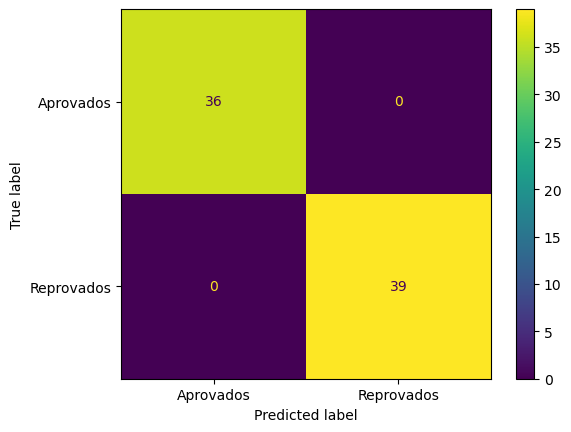

In [358]:
# ALTERNATIVA - 4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos 
# como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito:

X, y = make_classification(random_state=100)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=100)
model2 = SVC(random_state=100)
model2.fit(X_treino, y_treino)
SVC(random_state=100)
ConfusionMatrixDisplay.from_estimator(model2, X_treino, y_treino, 
                                      display_labels=['Aprovados','Reprovados']);

In [359]:
# ALTERNATIVA - 5. Calcule a acurácia na base de treinamento:

pred = model2.predict(X_treino)
accuracy_score(y_treino, pred)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [360]:
# 1. Classifique a base de teste de acordo com a árvore que você treinou no item 2:

#Considerando o 'score' dos modelos de treino (1.0) e de teste (0.92), podemos concluir que a base de teste é possível concluir
#que o segundo (teste) se mostra um bom instrumetno para avaliação de proponentes.

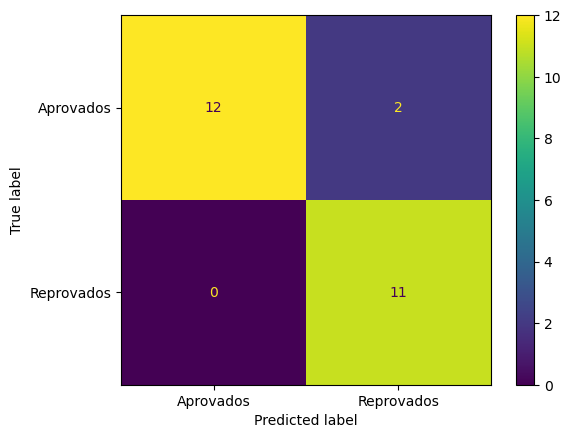

In [361]:
# 2. Produza a visualização da matriz de confusão para a base de teste:

X, y = make_classification(random_state=100)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=100)
model2 = SVC(random_state=100)
model2.fit(X_treino, y_treino)
SVC(random_state=100)
ConfusionMatrixDisplay.from_estimator(model2, X_teste, y_teste, 
                                      display_labels=['Aprovados','Reprovados']);

In [362]:
# 3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento:

pred = model2.predict(Xval)
accuracy_score(y_teste, pred)

0.92

In [363]:
# Comparando a acurácia da base de treino e da base de teste:

model2.score(X_treino, y_treino), model2.score(X_teste, y_teste)

(1.0, 0.92)

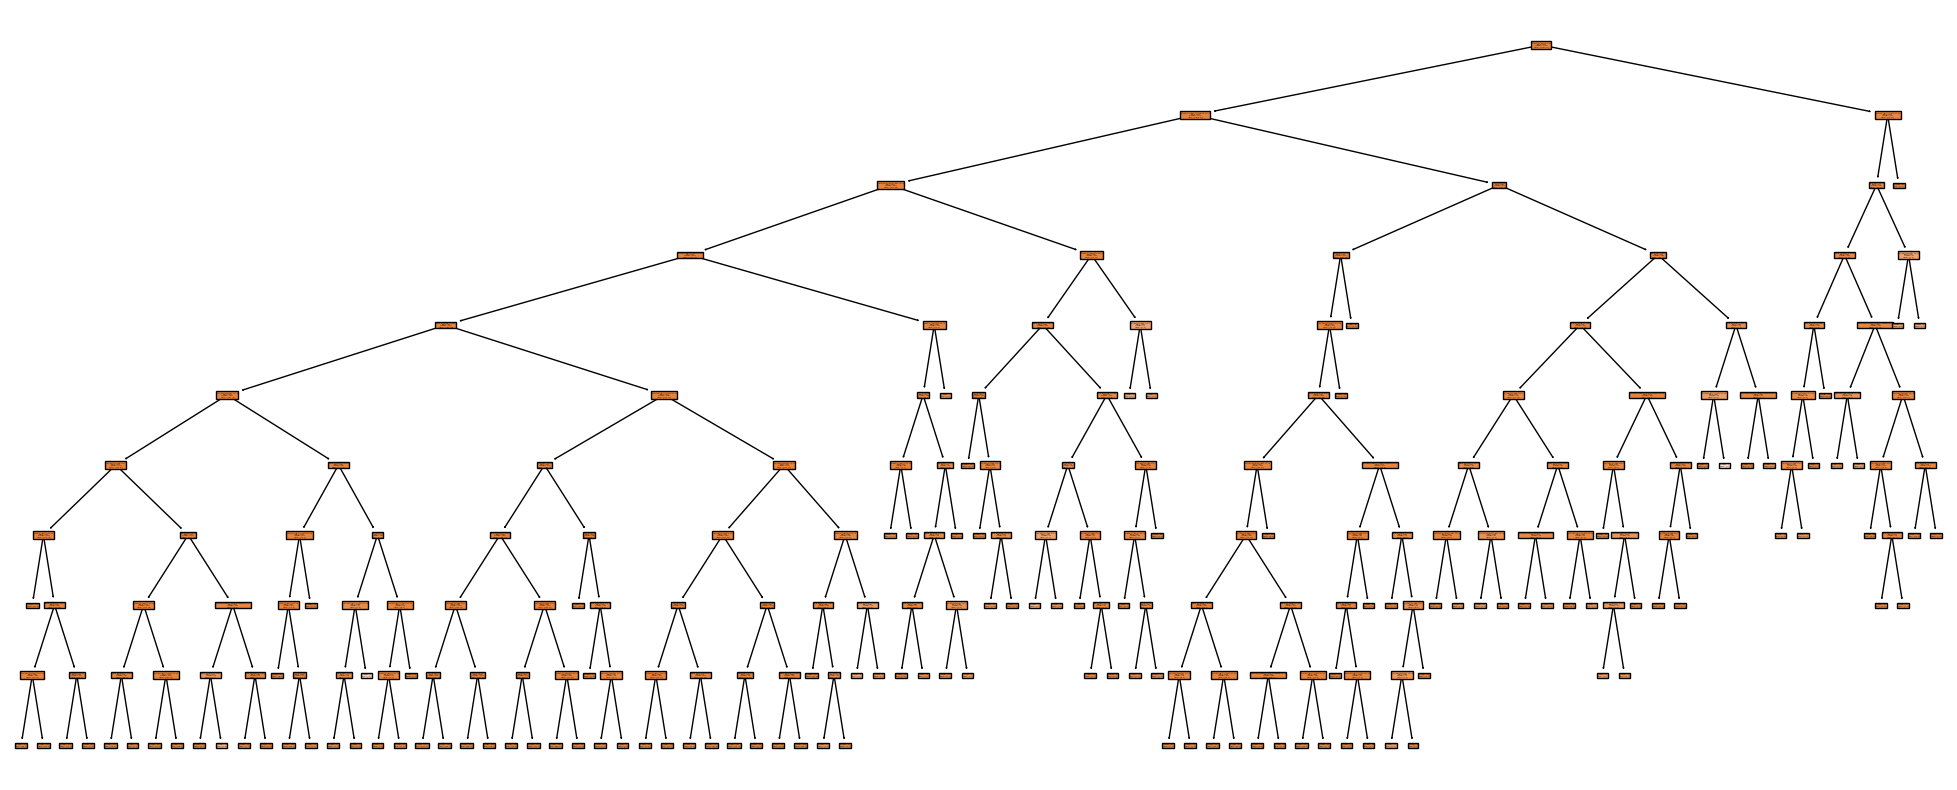

In [364]:
# 4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10.
# Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual 
# a proporção de proponentes foram classificados como 'maus'?

y = pd.DataFrame(df['mau'])
X = pd.DataFrame(df.drop('mau', axis=1))
[X_treino, X_teste, y_treino, y_teste] = train_test_split(X, y, 
                                          test_size = 0.3, random_state=123)

model3 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
model3.fit(X_treino, y_treino)
plt.figure(figsize = (25, 10))

plot_tree(model3, feature_names = X_treino.columns, filled = True);

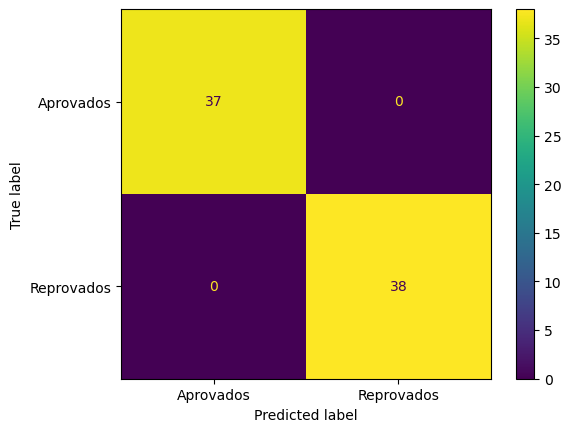

In [365]:
X, y = make_classification(random_state=123)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=123)
model3 = SVC(random_state=123)
model3.fit(X_treino, y_treino)
SVC(random_state=123)
ConfusionMatrixDisplay.from_estimator(model3, X_treino, y_treino, 
                                      display_labels=['Aprovados','Reprovados']);

In [366]:
# a proporção de proponentes classificados como 'maus' é de apoximadamente 50% para essa nova árvore.

In [367]:
# 5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [368]:
df = pd.read_csv('demo02.csv')

y2 = df['mau']
y2.replace({True: 1, False: 1}, inplace=True)

X2 = df.drop('mau', axis=1)

[X2_treino, X2_teste, y2_treino, y2_teste] = train_test_split(X, y, 
                                          test_size = 0.3, random_state=100)

In [369]:
model4 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
model4.fit(X2_treino, y2_treino)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [311]:
pred = model3.predict(X2_treino)
accuracy_score(y2_treino, pred)

0.9571428571428572